In [ ]:
import numpy as np
import pandas as pd
wcat=pd.read_csv("wc-at.csv")
print(wcat.columns)

In [ ]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


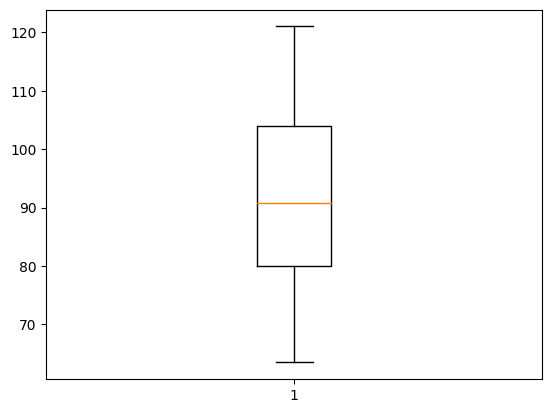

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(wcat.Waist)
plt.show()

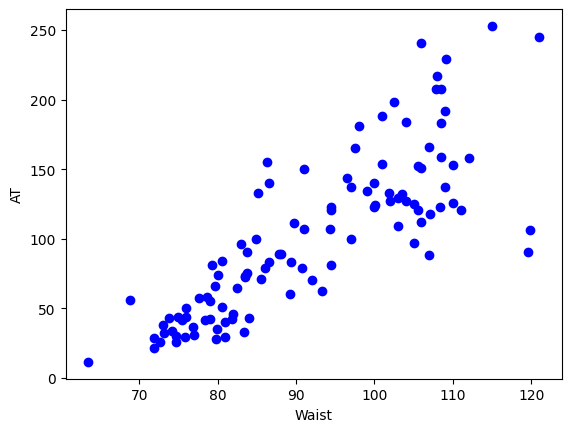

In [ ]:
plt.plot(wcat.Waist,wcat.AT,"bo")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.show()

In [ ]:
wcat.AT.corr(wcat.Waist) # # correlation value between X and Y
np.corrcoef(wcat.AT,wcat.Waist)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [ ]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wcat).fit()

In [ ]:
# For getting coefficients of the varibles used in equation
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
# P-values for the variables and R-squared value for prepared model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.62e-27
Time:                        12:37:46   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred = model.predict(wcat.iloc[:,0]) # Predicted values of AT using the model
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [ ]:
pred.corr(wcat.AT)

0.8185578128958535

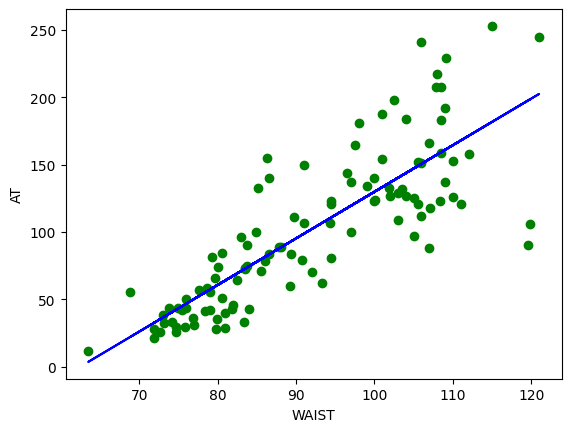

In [ ]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred,color='blue')
plt.xlabel('WAIST')
plt.ylabel('AT')
plt.show()

eval_env: 1
eval_env: 1


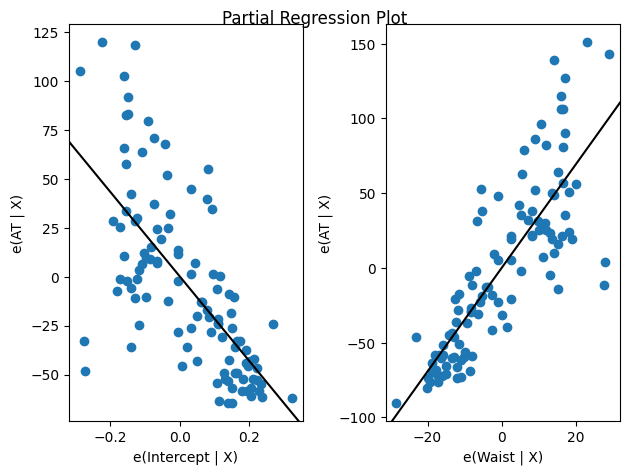

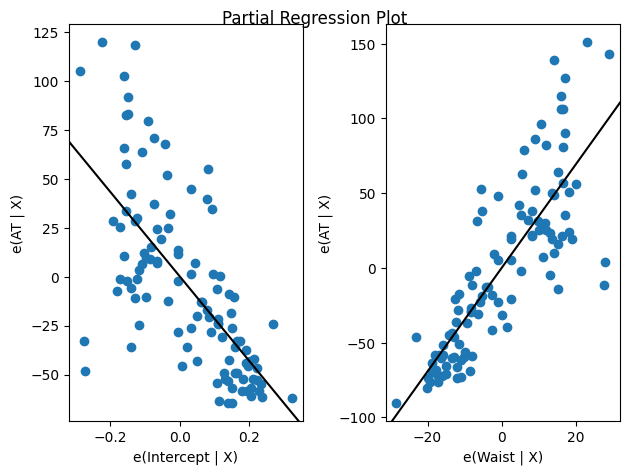

In [ ]:
# Added variable plot
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model)

In [ ]:
# SHAP - Machine Learning Interpretability

# Transforming variables for accuracy - Log transformation of output
model2 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model2.params


Intercept    0.741021
Waist        0.040252
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.68e-30
Time:                        12:39:28   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_log = model2.predict(pd.DataFrame(wcat['Waist']))
pred_log

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [ ]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [ ]:
pred3.corr(wcat.AT)

0.7633804583650525

<ipython-input-18-016ddfe3de44>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcat.Waist,np.exp(pred_log),"bo",color='blue',);


Text(0, 0.5, 'TISSUE')

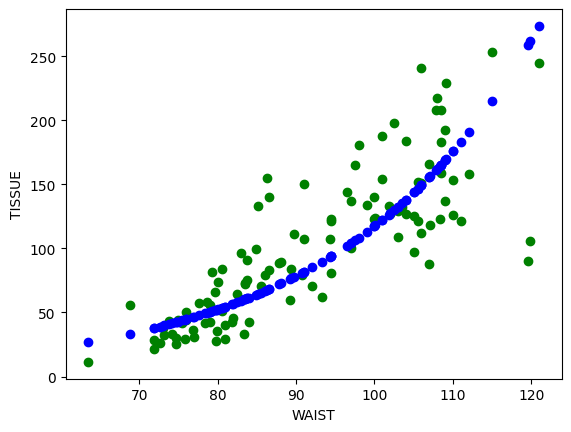

In [ ]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');
plt.plot(wcat.Waist,np.exp(pred_log),"bo",color='blue',);
plt.xlabel('WAIST');
plt.ylabel('TISSUE')


Text(0, 0.5, 'Standardized Residual')

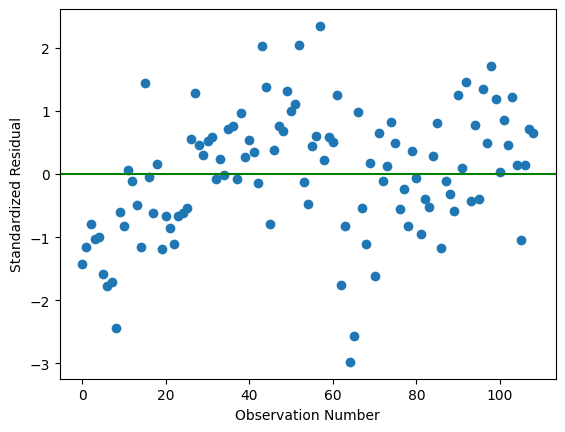

In [ ]:
# Difference between actual and predicted, plot residuals
student_resid = model2.resid_pearson
student_resid
plt.plot(model2.resid_pearson,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

In [ ]:
# MSE
# RMSE -> lower is the better 0 to Inf
# Normalization ->
# Sqrt((observed - predicted)^2)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(wcat.AT,np.exp(pred_log)))


In [ ]:
#Multilinear Regression

import pandas as pd
import matplotlib.pyplot as plt

# loading the data
cars = pd.read_csv("Cars.csv")

# to get top 6 rows
cars.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


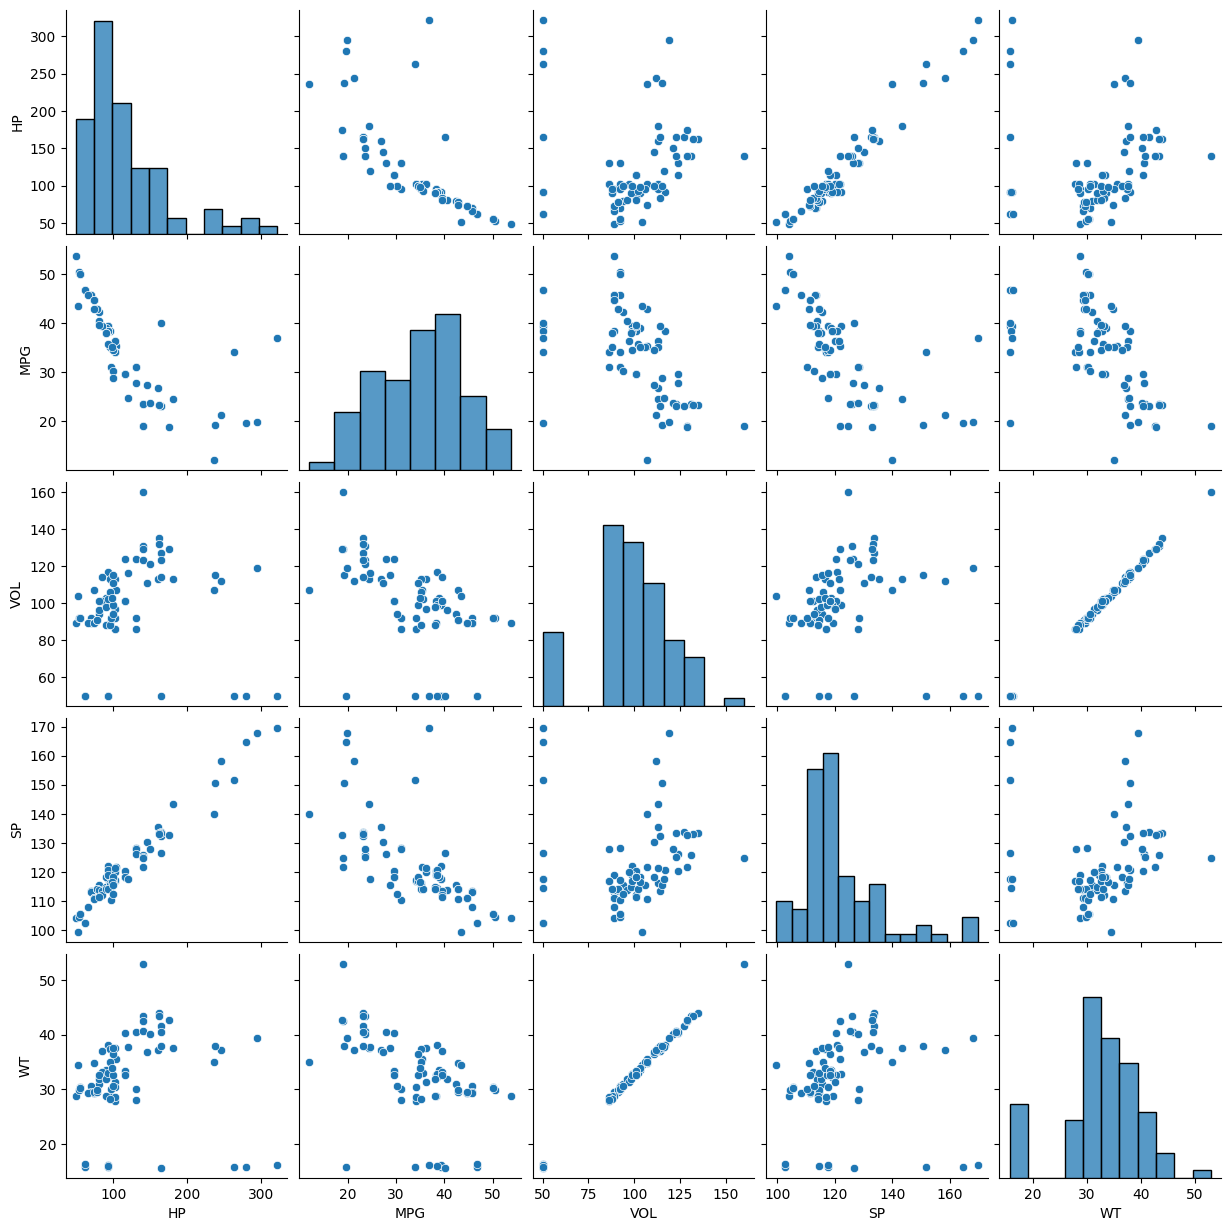

In [ ]:
# Scatter plot between the variables along with histograms
import seaborn as sns

sns.pairplot(cars)
plt.savefig('Cars.jpg')
#plt.show()

In [ ]:
# columns names
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [ ]:
# preparing model considering all the variables
import statsmodels.formula.api as smf  # for regression model

# Preparing model
ml1 = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()  # regression model
#ml1 = smf.ols('MPG~C(WT):C(VOL)+VOL+SP+HP', data=cars).fit()
# Getting coefficients of variables
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [ ]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.54e-23
Time:                        12:43:30   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# preparing model based only on Volume
ml_v = smf.ols('MPG~VOL', data=cars).fit()
ml_v.summary()  # 0.271
# p-value <0.05 .. It is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 05 May 2023   Prob (F-statistic):           3.82e-07
Time:                        12:43:44   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Preparing model based only on WT
ml_w = smf.ols('MPG~WT', data=cars).fit()
ml_w.summary()  # 0.268

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Fri, 05 May 2023   Prob (F-statistic):           4.38e-07
Time:                        12:43:54   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Preparing model based only on WT & VOL
ml_wv = smf.ols('MPG~WT+VOL', data=cars).fit()
ml_wv.summary()  # 0.264
# Both coefficients p-value became insignificant...
# So there may be a chance of considering only one among VOL & WT

# Checking whether data has any influential values
# influence index plots


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.43e-06
Time:                        12:44:33   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept    25.527511
VOL          -0.182530
HP           -0.229084
SP            0.441482
dtype: float64

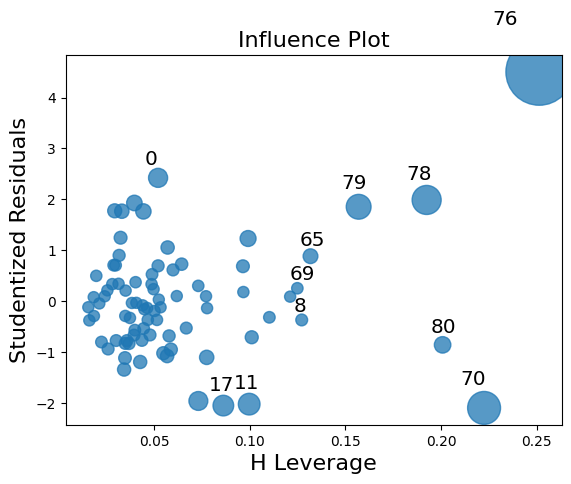

In [ ]:
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# index 76 AND 78 is showing high influence so we can exclude that entire row

cars_new = cars.drop(cars.index[[76, 70]], axis=0)

# Preparing model
#ml_wv = smf.ols('MPG~WT+VOL', data=cars_new).fit()
#ml_wv.summary()  # 0.264

ml_new = smf.ols('MPG~VOL+HP+SP', data=cars_new).fit()

# Getting coefficients of variables
ml_new.params

In [ ]:
# Summary
ml_new.summary()  # 0.806


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.65e-27
Time:                        12:45:25   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
SP             0.4415      0.141      3.124      0.003       0.160       0.723
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predicted values of MPG
mpg_pred = ml_new.predict(cars_new[['VOL', 'HP', 'SP']])
mpg_pred

0     44.053224
1     42.694424
2     42.694424
3     42.790029
4     42.711109
        ...    
75    20.548675
77    16.491552
78    23.080092
79    10.371281
80    13.670311
Length: 79, dtype: float64

In [ ]:
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


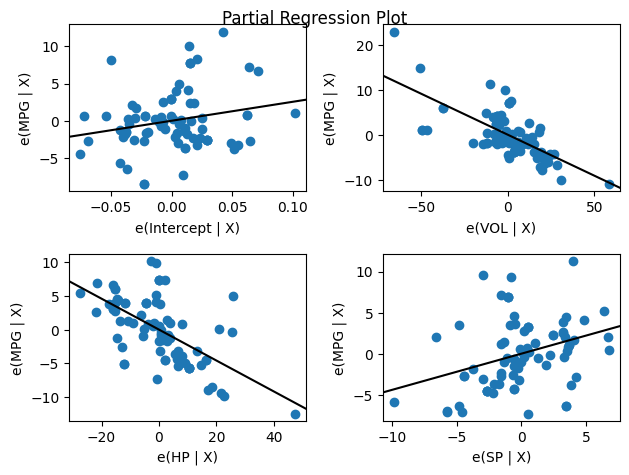

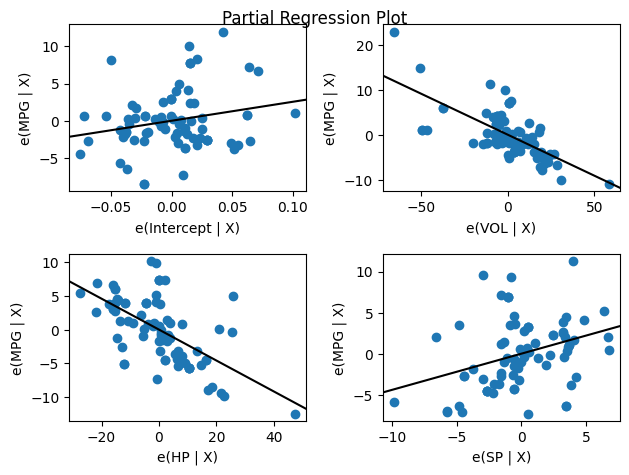

In [ ]:
# Added variable plot
sm.graphics.plot_partregress_grid(ml_new)

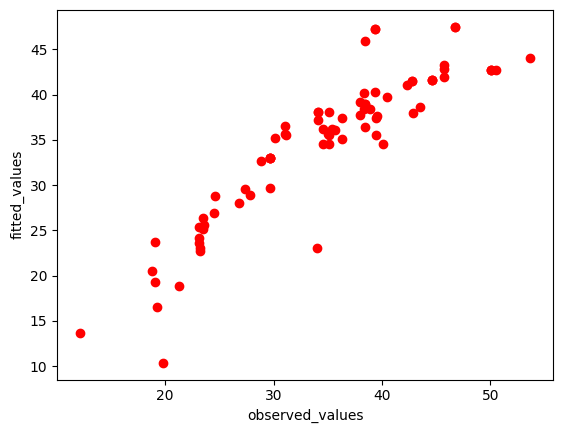

In [ ]:
# Observed values VS Fitted values - Linearity
plt.scatter(cars_new.MPG, mpg_pred, c="r");
plt.xlabel("observed_values");
plt.ylabel("fitted_values")
plt.show()


In [ ]:

# Poisson Regression
# Loading the libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn

# Poisson regression - compare against linear model
df = pd.read_csv("mtcars.csv")


In [ ]:
psnmodel = psn.from_formula("gear ~ mpg", data=df).fit()
psnmodel.summary()

Optimization terminated successfully.
         Current function value: 1.639026
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                   gear   No. Observations:                   32
Model:                        Poisson   Df Residuals:                       30
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 May 2023   Pseudo R-squ.:                0.009774
Time:                        12:47:18   Log-Likelihood:                -52.449
converged:                       True   LL-Null:                       -52.967
Covariance Type:            nonrobust   LLR p-value:                    0.3089
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9894      0.325      3.045      0.002       0.352       1.626
mpg            0.0155      0.015      1.027      0.305      -0.014       0.045
==============================================================================
"""

In [ ]:
# Lasso & Ridge regression.

# no significant p value, low r-squared value

psnmodel.predict(df['mpg'])

0     3.723756
1     3.723756
2     3.829072
3     3.746906
4     3.593389
5     3.560138
6     3.356575
7     3.925185
8     3.829072
9     3.621336
10    3.543628
11    3.467587
12    3.516281
13    3.403709
14    3.159751
15    3.159751
16    3.377442
17    4.443169
18    4.307592
19    4.547644
20    3.752716
21    3.419568
22    3.403709
23    3.304968
24    3.621336
25    4.105579
26    4.023710
27    4.307592
28    3.435500
29    3.649500
30    3.393178
31    3.746906
dtype: float64

In [ ]:
# Logistic regression

# Importing Data
claimants = pd.read_csv("claimants.csv")

claimants.head(4)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037


In [ ]:
# removing CASENUM
claimants = claimants.drop(["CASENUM"], axis=1)

claimants.head(4)  # to see top 4 observations

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037


In [ ]:
# Check null values
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


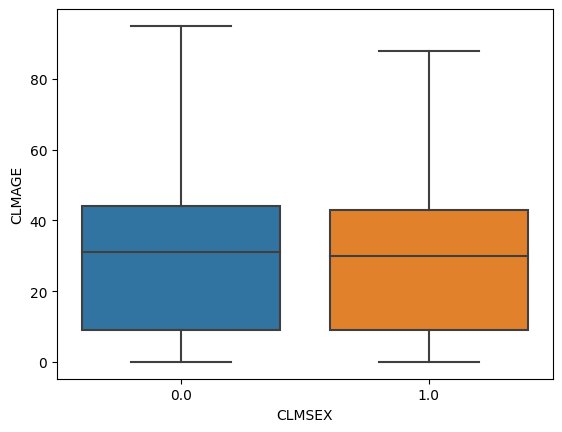

In [ ]:
# Box plot
import seaborn as sns
sns.boxplot(x="CLMSEX", y="CLMAGE", data=claimants)

claimants.describe()

In [ ]:
#claimants.iloc[:, 0:4].columns

# Imputating the missing values with most repeated values in that column
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:

# filling the missing value with most occurring value
claimants.iloc[:, 0:4] = claimants.iloc[:, 0:4].apply(lambda x: x.fillna(x.value_counts().index[0]))
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:


claimants.CLMAGE = claimants.CLMAGE.fillna(claimants.CLMAGE.mean())

# Approach 2 - filling the missing value with mean of that column
claimants.iloc[:, 4:] = claimants.iloc[:, 4:].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Checking if we have na values or not
claimants.isnull().sum()  # No null values

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
# Model building

import statsmodels.formula.api as sm
logit_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT', data=claimants).fit()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


In [ ]:
# summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 May 2023   Pseudo R-squ.:                  0.1209
Time:                        12:53:49   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [ ]:
y_pred = logit_model.predict(claimants)
claimants["pred_prob"] = y_pred
# Creating new column for storing predicted class of Attorney

In [ ]:
# filling all the cells with zeroes
claimants["Att_val"] = np.zeros(1340)
claimants.Att_val

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1335    0.0
1336    0.0
1337    0.0
1338    0.0
1339    0.0
Name: Att_val, Length: 1340, dtype: float64

In [ ]:
# taking threshold value as 0.5 and above the prob value will be treated
# as correct value
claimants.loc[y_pred >= 0.5, "Att_val"] = 1
claimants.Att_val

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1335    1.0
1336    0.0
1337    1.0
1338    0.0
1339    1.0
Name: Att_val, Length: 1340, dtype: float64

In [ ]:
# confusion matrix
confusion_matrix = pd.crosstab(claimants['ATTORNEY'], claimants.Att_val)

confusion_matrix

Att_val,0.0,1.0
ATTORNEY,,
0,436,249
1,151,504


In [ ]:
diagonal_sum = 0
for i in range(len(confusion_matrix)):
    diagonal_sum = diagonal_sum + confusion_matrix.iloc[i][i]

In [ ]:
accuracy = diagonal_sum / confusion_matrix.sum().sum()
print(accuracy)

0.7014925373134329


Text(0, 0.5, 'True Positive')

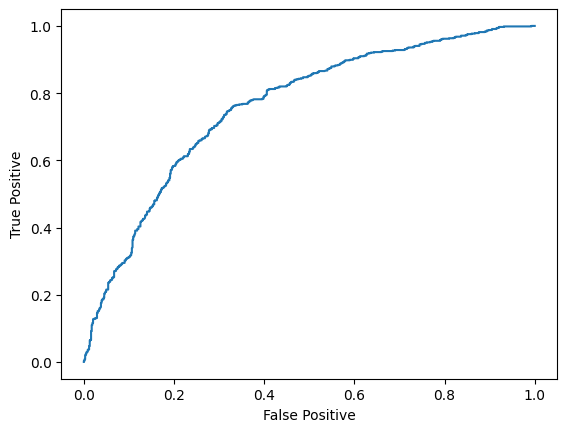

In [ ]:
# ROC curve ##Receiver Operating Characteristics
from sklearn import metrics

# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(claimants.ATTORNEY, y_pred)

# the above function is applicable for binary classification class
import matplotlib.pyplot as plt

plt.plot(fpr, tpr);
plt.xlabel("False Positive");
plt.ylabel("True Positive")

In [ ]:
roc_auc = metrics.auc(fpr, tpr)  # area under ROC curve
roc_auc

0.7601014097063576

In [ ]:
#---
# Using Train Test Method.
### Dividing data into train and test data sets
claimants.drop("Att_val", axis=1, inplace=True)
from sklearn.model_selection import train_test_split

train, test = train_test_split(claimants, test_size=0.3)

# checking na values
train.isnull().sum()
test.isnull().sum()

ATTORNEY     0
CLMSEX       0
CLMINSUR     0
SEATBELT     0
CLMAGE       0
LOSS         0
pred_prob    0
dtype: int64

In [ ]:
# Building a model on train data set

train_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT', data=train).fit()

# summary
train_model.summary()
train_pred = train_model.predict(train.iloc[:, 1:])
train_pred
# Creating new column for storing predicted class of Attorney

Optimization terminated successfully.
         Current function value: 0.626283
         Iterations 7


243     0.420647
675     0.657301
323     0.307492
319     0.544706
576     0.568608
          ...   
477     0.653065
909     0.664167
1160    0.664468
585     0.272767
516     0.718111
Length: 938, dtype: float64

In [ ]:

# filling all the cells with zeroes
train.loc[:,"train_pred"] = np.zeros(len(train))

# taking threshold value as 0.5 and above the prob value will be treated
# as correct value

#TODO:  Update for SettingWithCopyWarning
train.loc[train_pred > 0.5, "train_pred"] = 1


In [ ]:
# confusion matrix
confusion_matrix = pd.crosstab(train['ATTORNEY'], train.train_pred)

confusion_matrix

train_pred,0.0,1.0
ATTORNEY,,
0,299,176
1,117,346


In [ ]:
diagonal_sum = 0
for i in range(len(confusion_matrix)):
    diagonal_sum = diagonal_sum + confusion_matrix.iloc[i][i]

accuracy_train = diagonal_sum / confusion_matrix.sum().sum()
print(accuracy_train)

0.6876332622601279


In [ ]:
# Prediction on Test data set

test_pred = train_model.predict(test)

# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
test.loc[:,"test_pred"] = np.zeros(len(test))

# taking threshold value as 0.5 and above the prob value will be treated
# as correct value
test.loc[test_pred > 0.5, "test_pred"] = 1

# confusion matrix
confusion_matrix = pd.crosstab(test['ATTORNEY'], test.test_pred)


confusion_matrix
diagonal_sum = 0
for i in range(len(confusion_matrix)):
    diagonal_sum = diagonal_sum + confusion_matrix.iloc[i][i]

accuracy_test = diagonal_sum / confusion_matrix.sum().sum()
print(accuracy_test)

0.736318407960199


In [ ]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

f1_score_calc = f1_score(test['ATTORNEY'], test.test_pred,average='weighted')
print("F1 score - ",f1_score_calc)

F1 score -  0.7334128618971357


In [ ]:
accuracy_score_calc = accuracy_score(test['ATTORNEY'], test.test_pred)
print("Accuracy score - ",accuracy_score_calc)

Accuracy score -  0.736318407960199


In [ ]:
precision = precision_score(test['ATTORNEY'], test.test_pred)
print("Precision score - ",precision)

Precision score -  0.6762295081967213


In [ ]:
recall = recall_score(test['ATTORNEY'], test.test_pred)
print("Recall score - ",recall)

Recall score -  0.859375
